<a href="https://colab.research.google.com/github/hxrshitx/HR-Analytics-ML/blob/main/HR_Analytics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics & Employee Attrition Prediction

## Project Overview
This project analyzes employee data to predict attrition using multiple machine learning models (Logistic Regression, Decision Tree, Random Forest).
It provides insights into key factors driving employee turnover, helping HR make data-driven decisions.


## Dataset Description
The dataset includes employee demographics, job-related information, and compensation details.

**Key Features:**
- Age, Gender, Marital Status
- Department, Job Role, OverTime
- Monthly Income, JobLevel, YearsAtCompany
- Target: Attrition (Yes/No)


## Exploratory Data Analysis (EDA)
We analyze attrition distribution, department-wise attrition, income distribution, and feature correlations.


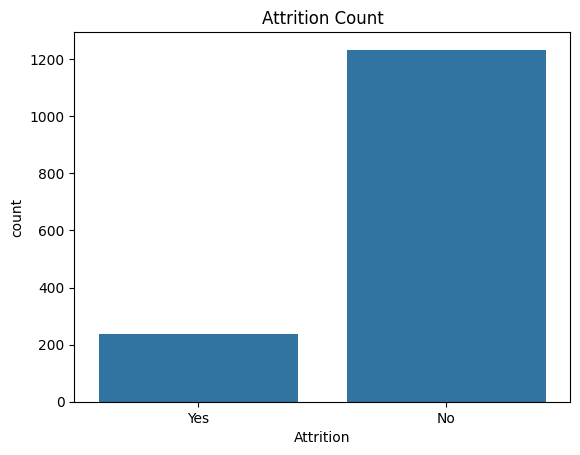

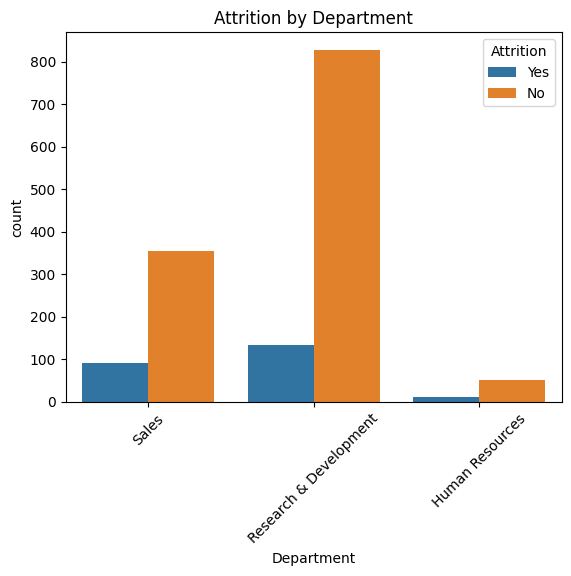

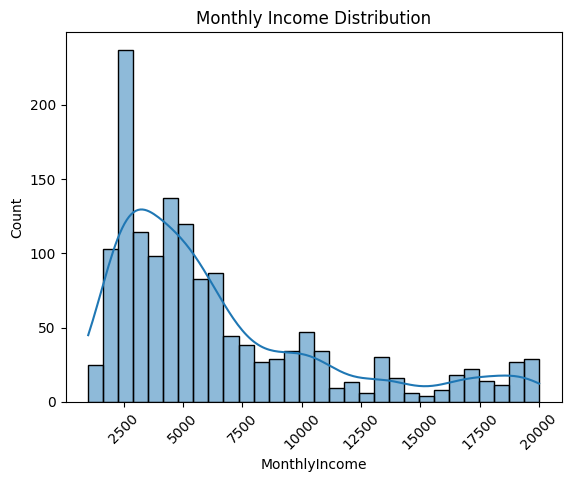

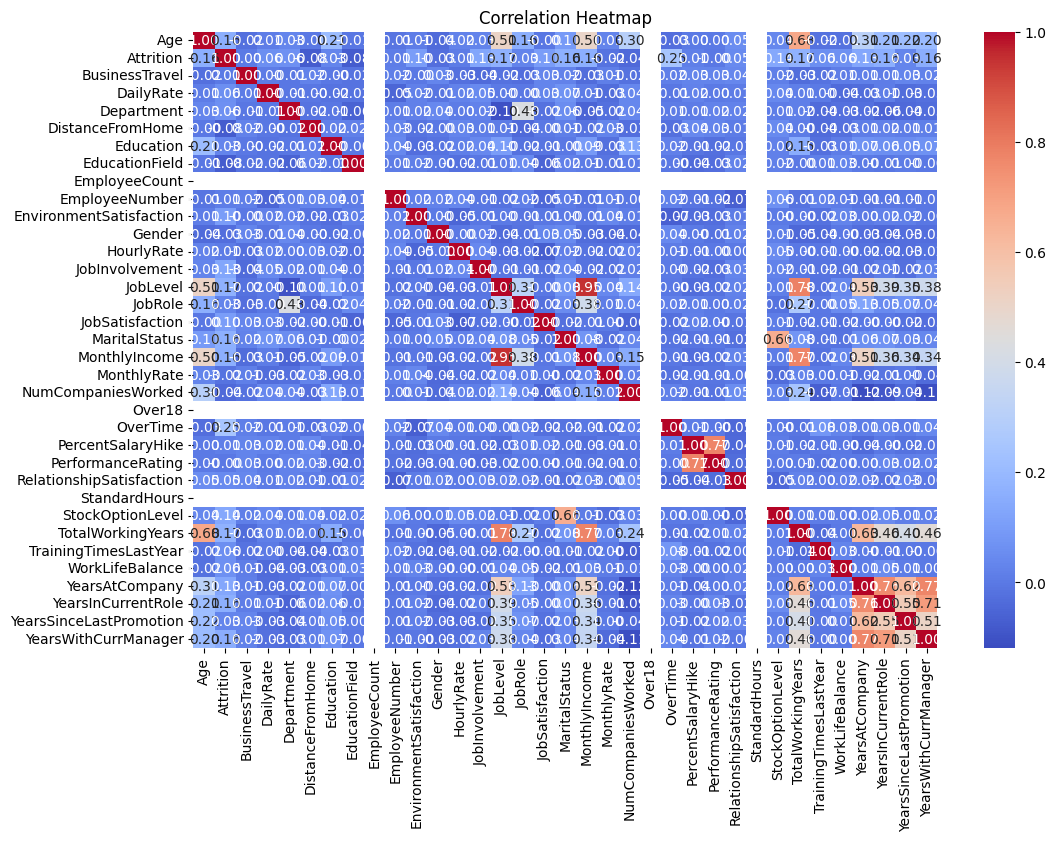

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the file is in the root of your Google Drive
df = pd.read_csv("/WA_Fn-UseC_-HR-Employee-Attrition.csv")

df.head()

sns.countplot (data= df, x= 'Attrition')
plt.title ("Attrition Count")
plt.show()

sns.countplot (data=df, x= 'Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation= 45)
plt.show()

sns.histplot(df['MonthlyIncome'], bins=30, kde= True)
plt.title("Monthly Income Distribution")
plt.xticks(rotation=45)
plt.show()

df_corr = df.copy()
for col in df_corr.select_dtypes(include='object').columns:
  df_corr[col]=pd.factorize(df_corr[col])[0]

plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing
- Encode categorical variables for machine learning
- Split data into features (X) and target (y)
- Split into training and test sets


Accuracy: 0.8673469387755102

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



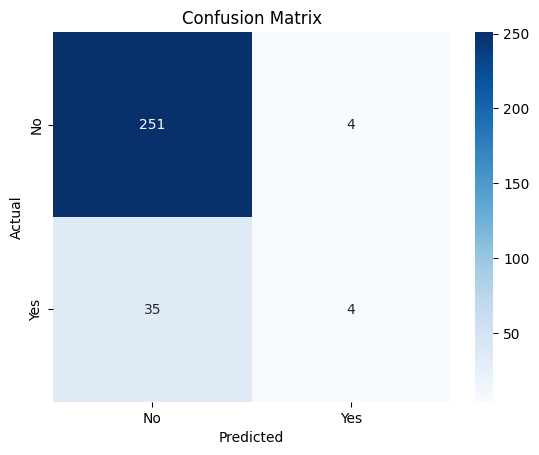

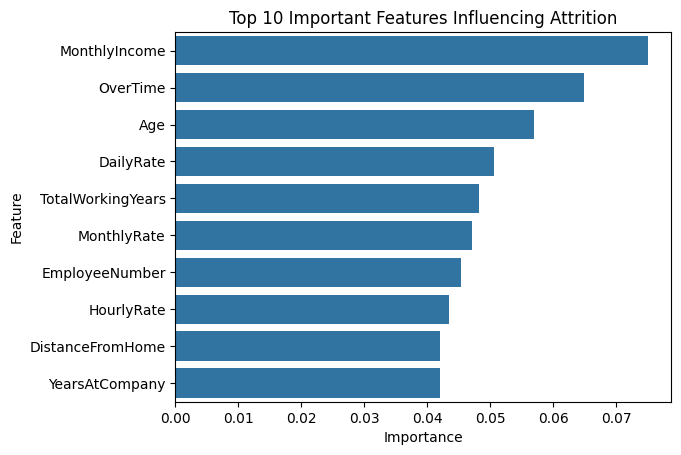

In [4]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changing original
df_ml = df.copy()

# Encode all object-type (categorical) columns
le = LabelEncoder()
for col in df_ml.select_dtypes(include='object').columns:
    df_ml[col] = le.fit_transform(df_ml[col])

# Check again
df_ml.head()

# Separate features and target
X = df_ml.drop('Attrition', axis=1)
y = df_ml['Attrition']

from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Initialize and train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Feature importance
importances = model.feature_importances_
features = X.columns

# Visualize top 10 important features
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title("Top 10 Important Features Influencing Attrition")
plt.show()


### Logistic Regression
We train a logistic regression model and evaluate its accuracy, classification report, and confusion matrix.


Logistic Regression Accuracy: 0.9013605442176871

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       255
           1       0.86      0.31      0.45        39

    accuracy                           0.90       294
   macro avg       0.88      0.65      0.70       294
weighted avg       0.90      0.90      0.88       294



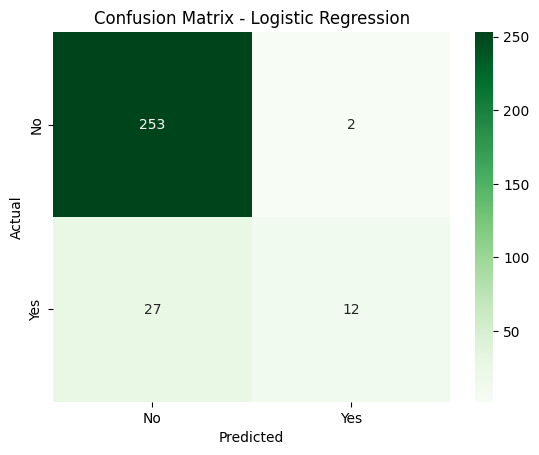

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

# Train
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Accuracy & report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Greens", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Decision Tree Classifier
We train a decision tree to understand feature importance and model predictions.


Decision Tree Accuracy: 0.8299319727891157

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.26      0.15      0.19        39

    accuracy                           0.83       294
   macro avg       0.57      0.54      0.55       294
weighted avg       0.80      0.83      0.81       294



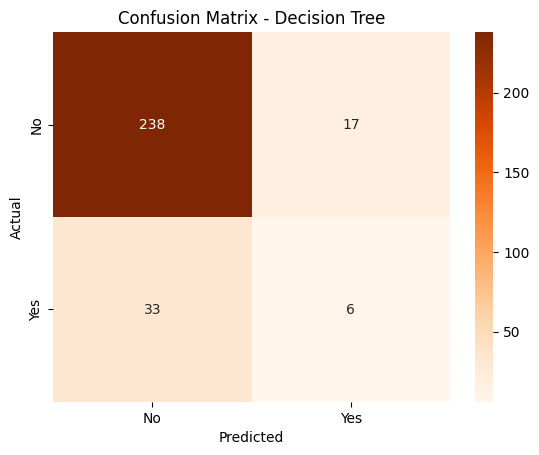

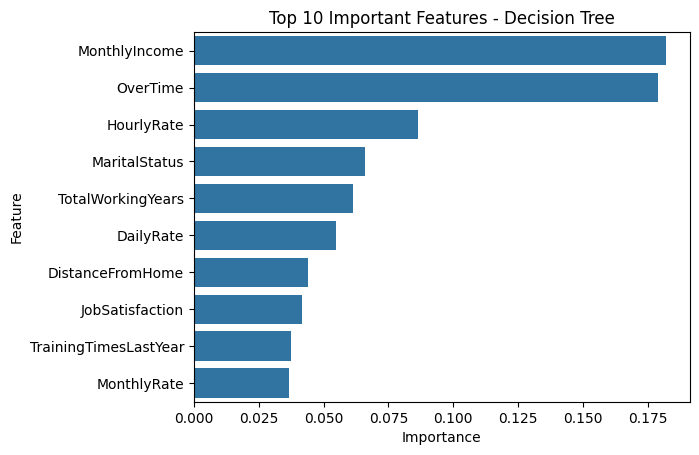

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)


dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Oranges", xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Feature importance
importances_dt = dt_model.feature_importances_
features = X.columns

feat_dt_df = pd.DataFrame({'Feature': features, 'Importance': importances_dt})
feat_dt_df = feat_dt_df.sort_values(by='Importance', ascending=False)

# Top 10 features
sns.barplot(x='Importance', y='Feature', data=feat_dt_df.head(10))
plt.title("Top 10 Important Features - Decision Tree")
plt.show()


### Random Forest Classifier
We train a Random Forest model to improve prediction accuracy and analyze feature importance for employee attrition.
*italicised text*

Random Forest Accuracy: 0.8673469387755102

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



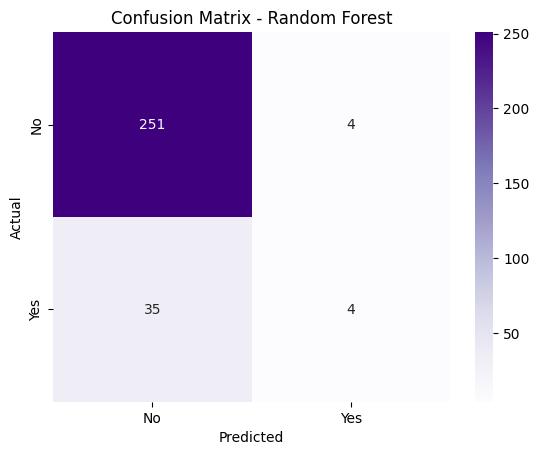

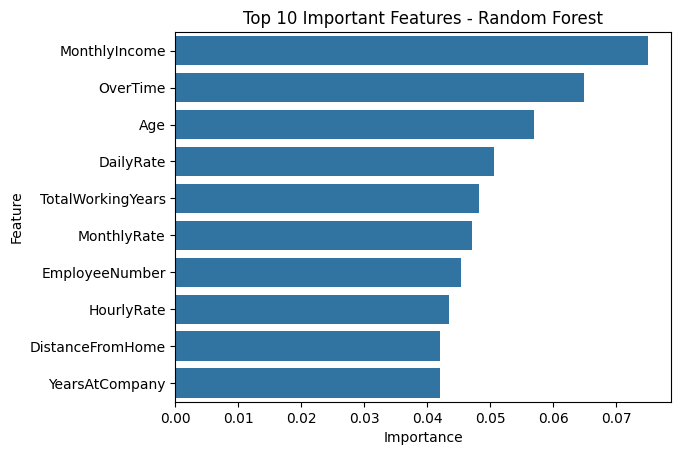

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy & Classification Report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Purples", xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Feature Importance
importances_rf = rf_model.feature_importances_
feat_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)

# Visualize Top 10 Features
sns.barplot(x='Importance', y='Feature', data=feat_rf_df.head(10))
plt.title("Top 10 Important Features - Random Forest")
plt.show()


### Model Summary

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {"Logistic Regression": log_reg, "Decision Tree": dt_model, "Random Forest": rf_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

--- Logistic Regression ---
Accuracy: 0.90
Precision: 0.86
Recall: 0.31
F1-Score: 0.45
Confusion Matrix:
[[253   2]
 [ 27  12]]

--- Decision Tree ---
Accuracy: 0.83
Precision: 0.26
Recall: 0.15
F1-Score: 0.19
Confusion Matrix:
[[238  17]
 [ 33   6]]

--- Random Forest ---
Accuracy: 0.87
Precision: 0.50
Recall: 0.10
F1-Score: 0.17
Confusion Matrix:
[[251   4]
 [ 35   4]]



## Save Model Predictions to CSV


In [9]:
import os
import pandas as pd

# make sure results folder exists
os.makedirs("results", exist_ok=True)

# --- Decision Tree Predictions ---
dt_pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": dt_model.predict(X_test)
})
dt_pred_df.to_csv("results/decision_tree_predictions.csv", index=False)

# --- Random Forest Predictions ---
rf_pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": rf_model.predict(X_test)
})
rf_pred_df.to_csv("results/random_forest_predictions.csv", index=False)

print("✅ Predictions from Decision Tree & Random Forest saved in the results/ folder!")


# --- Logistic Regression Predictions ---
lr_pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": log_reg.predict(X_test)
})
lr_pred_df.to_csv("results/logistic_regression_predictions.csv", index=False)

print("✅ Predictions from Logistic Regression saved in the results/ folder!")



✅ Predictions from Decision Tree & Random Forest saved in the results/ folder!
✅ Predictions from Logistic Regression saved in the results/ folder!


### Save cleaned dataset for Power BI

In [13]:
# Save cleaned dataset for Power BI
df_ml.to_csv("/content/results/hr_data_cleaned.csv", index=False)

print("✅ Cleaned HR dataset saved to results/hr_data_cleaned.csv")


✅ Cleaned HR dataset saved to results/hr_data_cleaned.csv


## 🔍 Key Insights
- Majority of employees did **not** leave (Attrition = No).
- **OverTime**, **MonthlyIncome**, and **JobSatisfaction** may be influencing attrition.
- Employees with **low income** and **high distance from home** show more attrition.


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
